# Clustering - Crime Rate

### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### Data Description:

    Murder -- Muder rates in different places of United States
    Assualt- Assualt rate in different places of United States
    UrbanPop - urban population in different places of United States
    Rape - Rape rate in different places of United States

### Project Background

Analysing the different crime rates in different areas of United States.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Crime data
crime_data = pd.read_csv("/kaggle/input/crime-data/crime_data.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
# Shape of the data
crime_data.shape

(50, 5)

In [5]:
# Summary of the data
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
# Check the data types
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#### Modifying the dataset

In [7]:
# Renaming the Unnamed: 0 Column into States
crime_data = crime_data.rename(columns={"Unnamed: 0":"States"})
crime_data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
# Check for duplicate values
crime_data[crime_data.duplicated()].shape

(0, 5)

In [10]:
crime_data[crime_data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


#### There are no missing values.

### Step-2.3 : Exploring data using Visualisation

#### Histogram

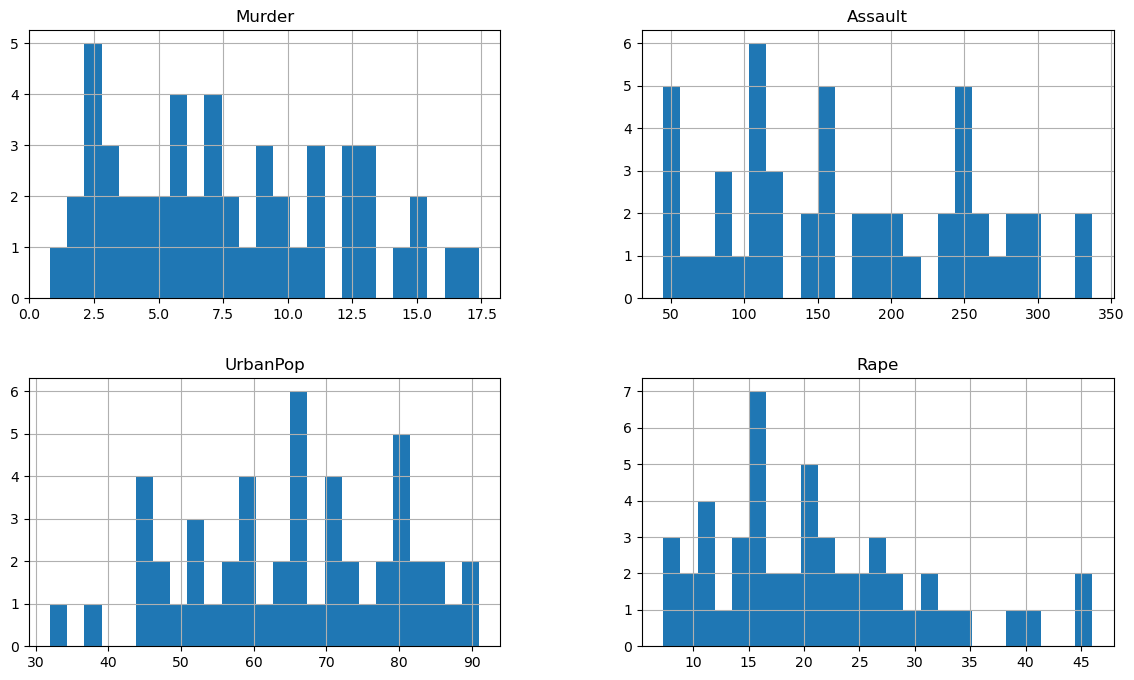

In [11]:
crime_data.hist(figsize=(14,8),bins=25)
plt.show()

#### Boxplot

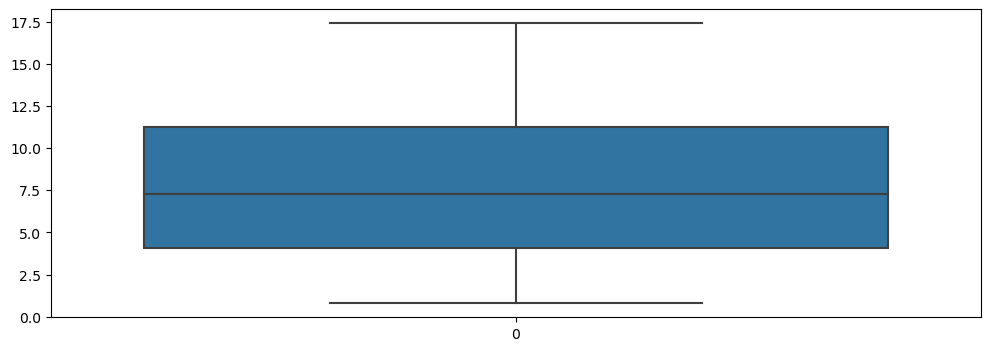

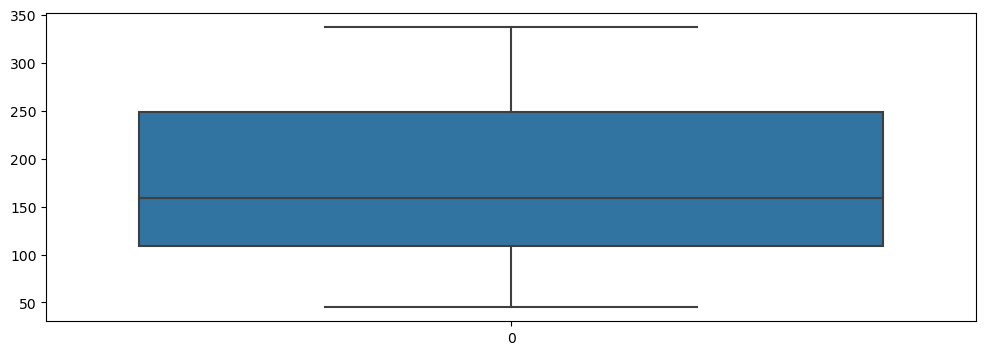

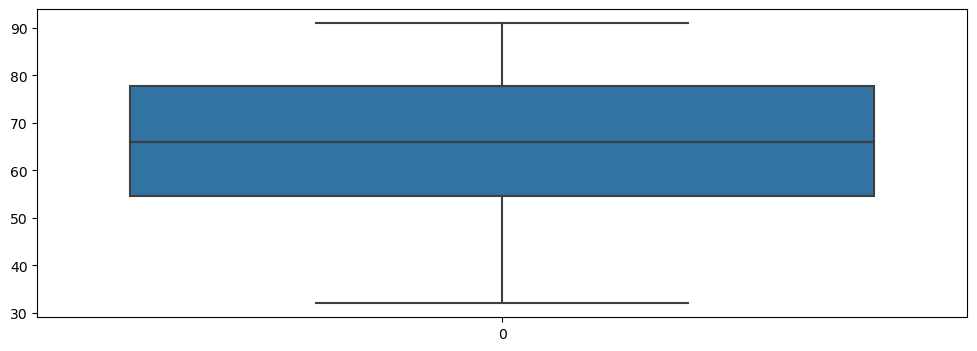

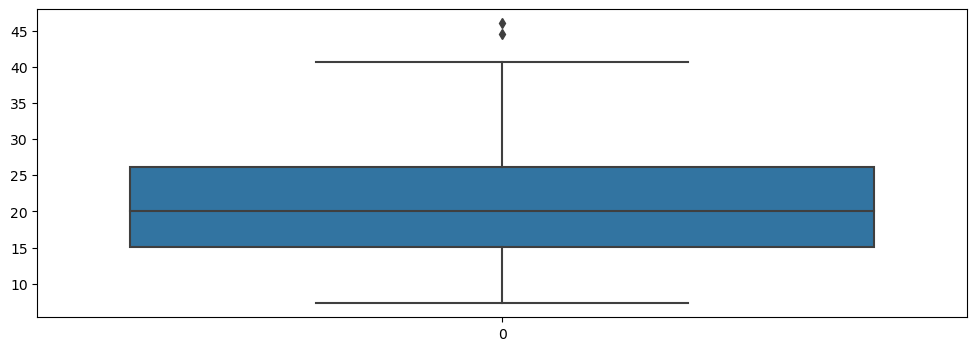

In [12]:
for feature in crime_data.columns[1:]:
    plt.figure(figsize=(12,4))
    sb.boxplot(crime_data[feature])

#### Comparing features using Boxplots

<AxesSubplot:>

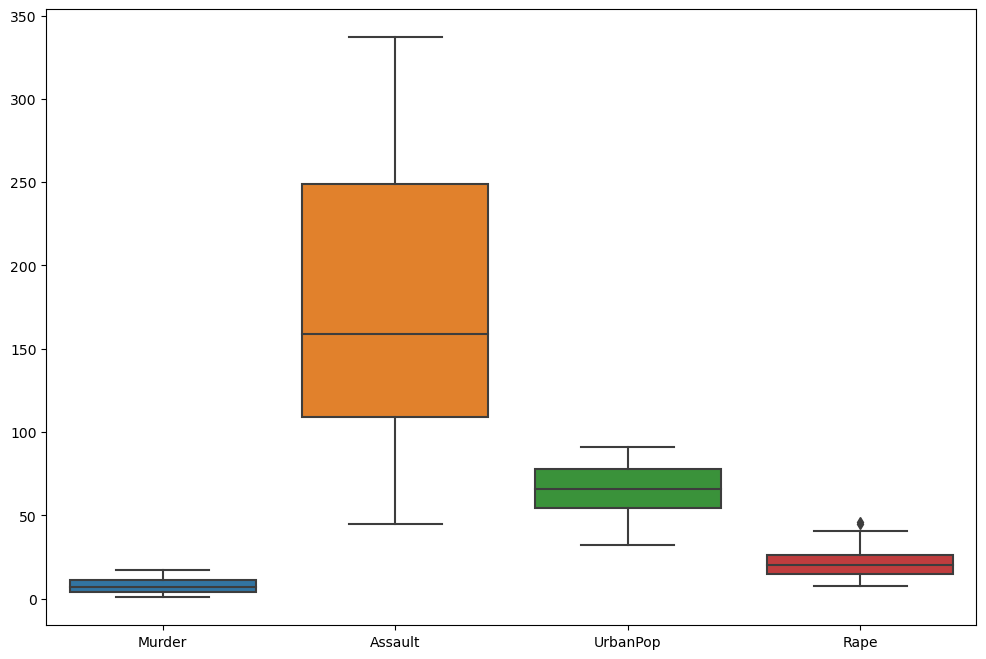

In [13]:
plt.figure(figsize=(12,8))
sb.boxplot(data=crime_data)

#### Observation
+ We can clearly see that Assault crime rate is high, followed by rape and murder crime rate.

#### Correlation and Heat map

In [14]:
# Checking for Correlation between variables
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


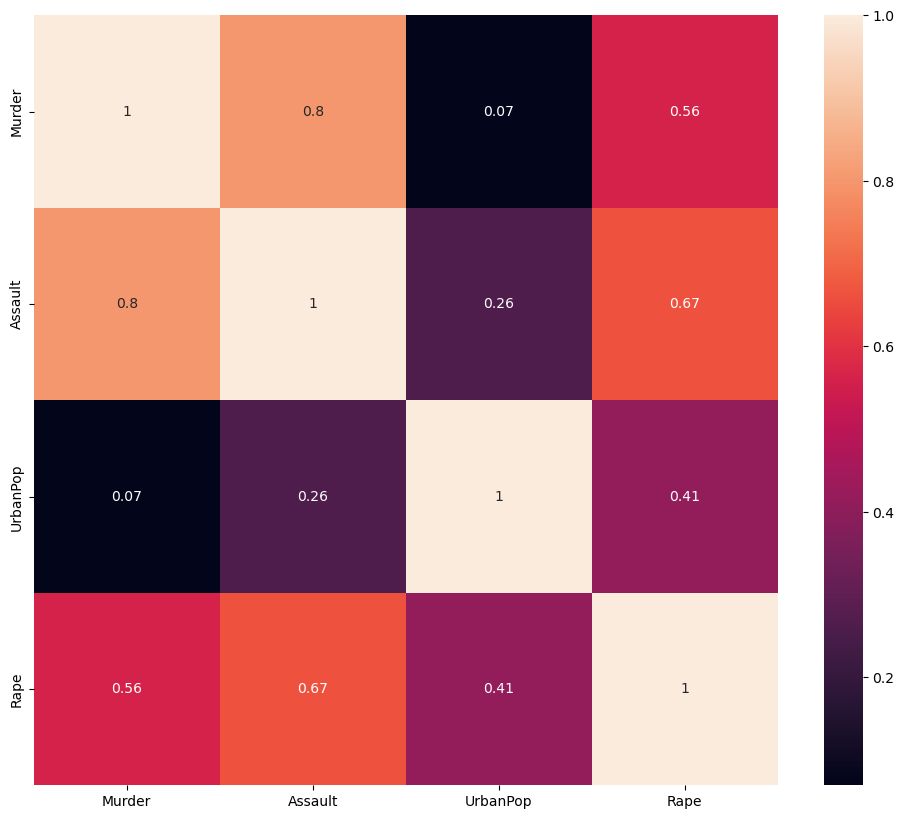

In [15]:
plt.figure(figsize=(12,10))
sb.heatmap(crime_data.corr(),annot=True)
plt.show()

#### Observation
+ We can see that 'Urban' population is not much influencing the Assault and murder rate. But it may be a reason for Rape rate.
+ But Murder rate and Rape rate are strongly correlated to Assault rate.

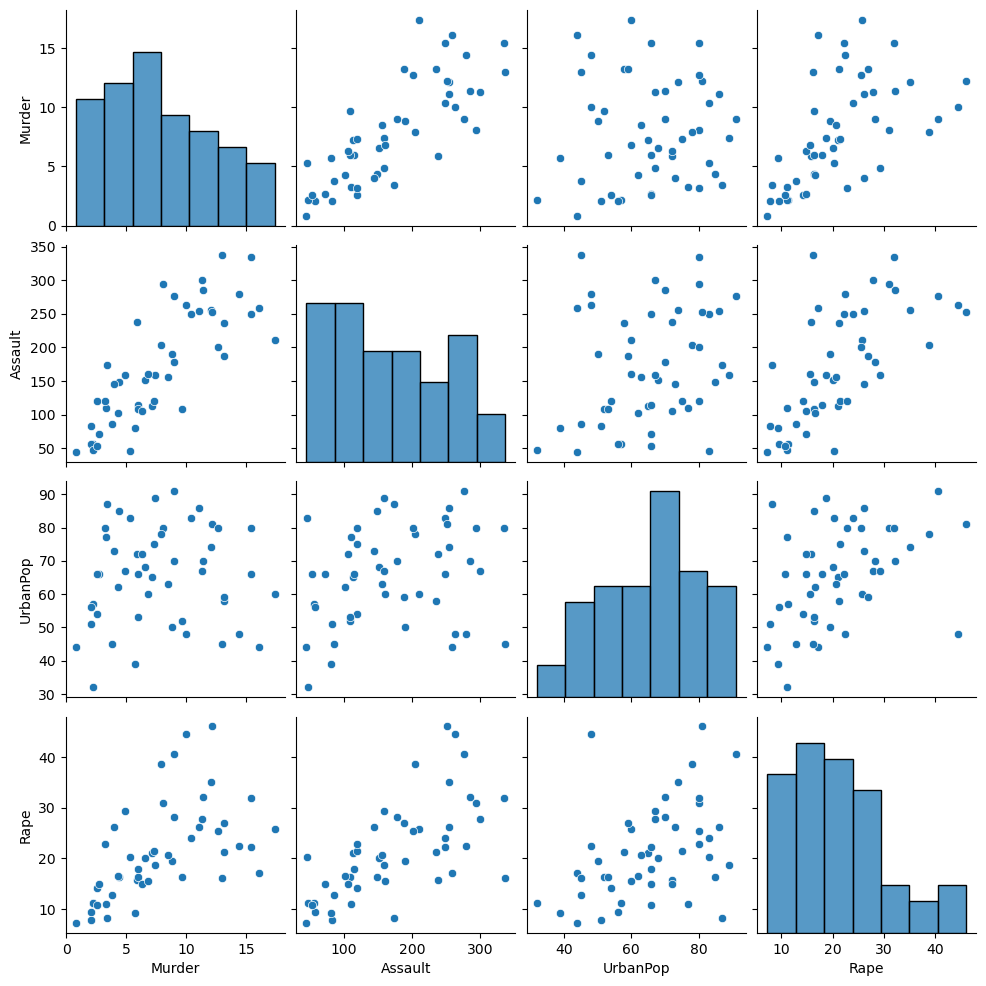

In [16]:
sb.pairplot(data=crime_data)

#### Visualizing features State wise

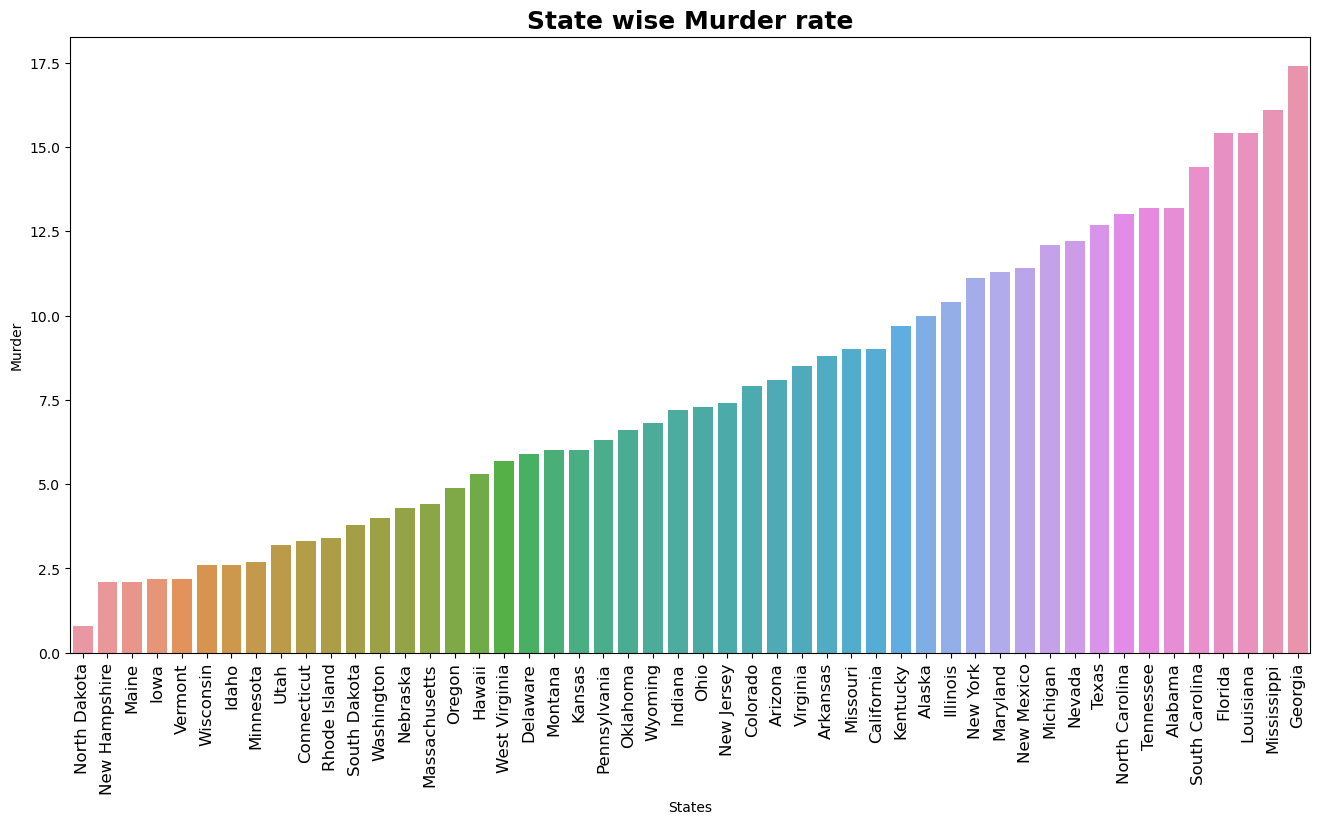

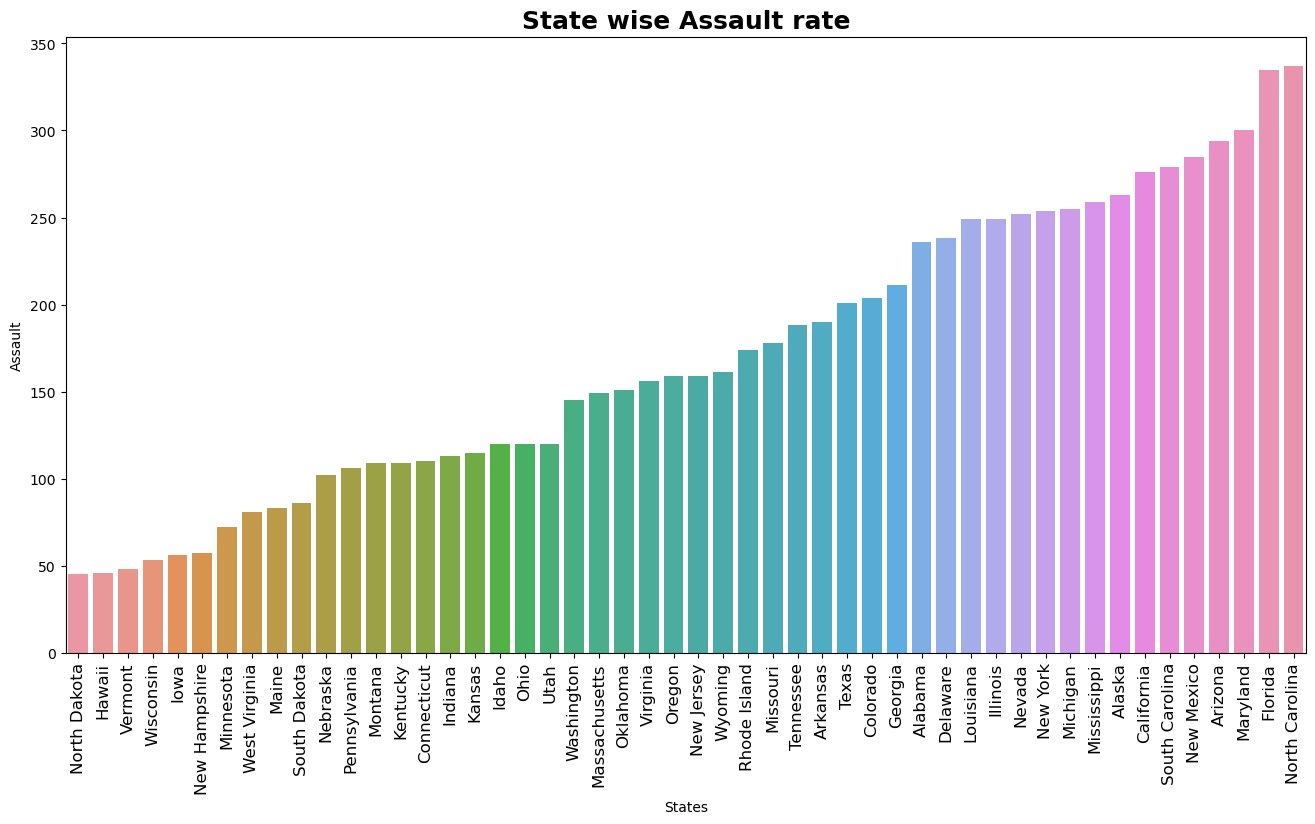

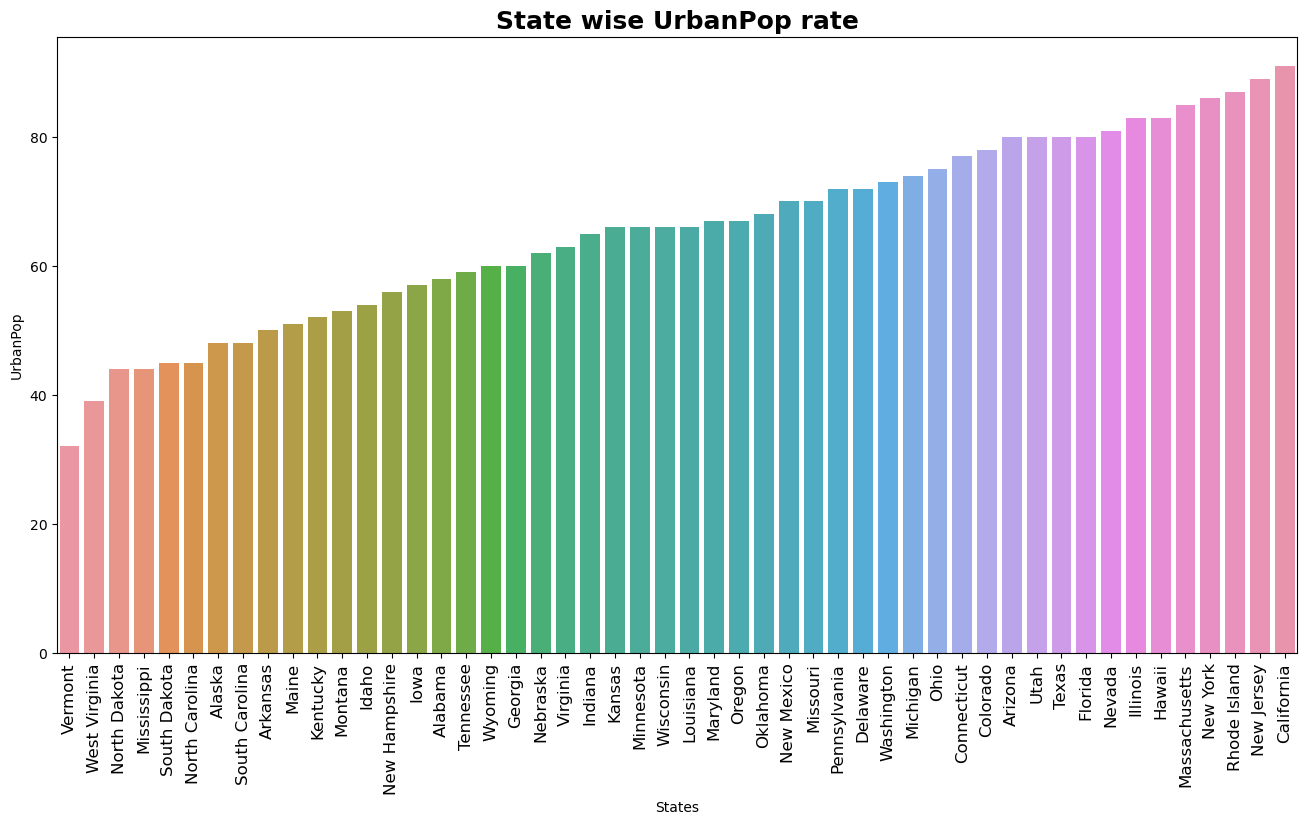

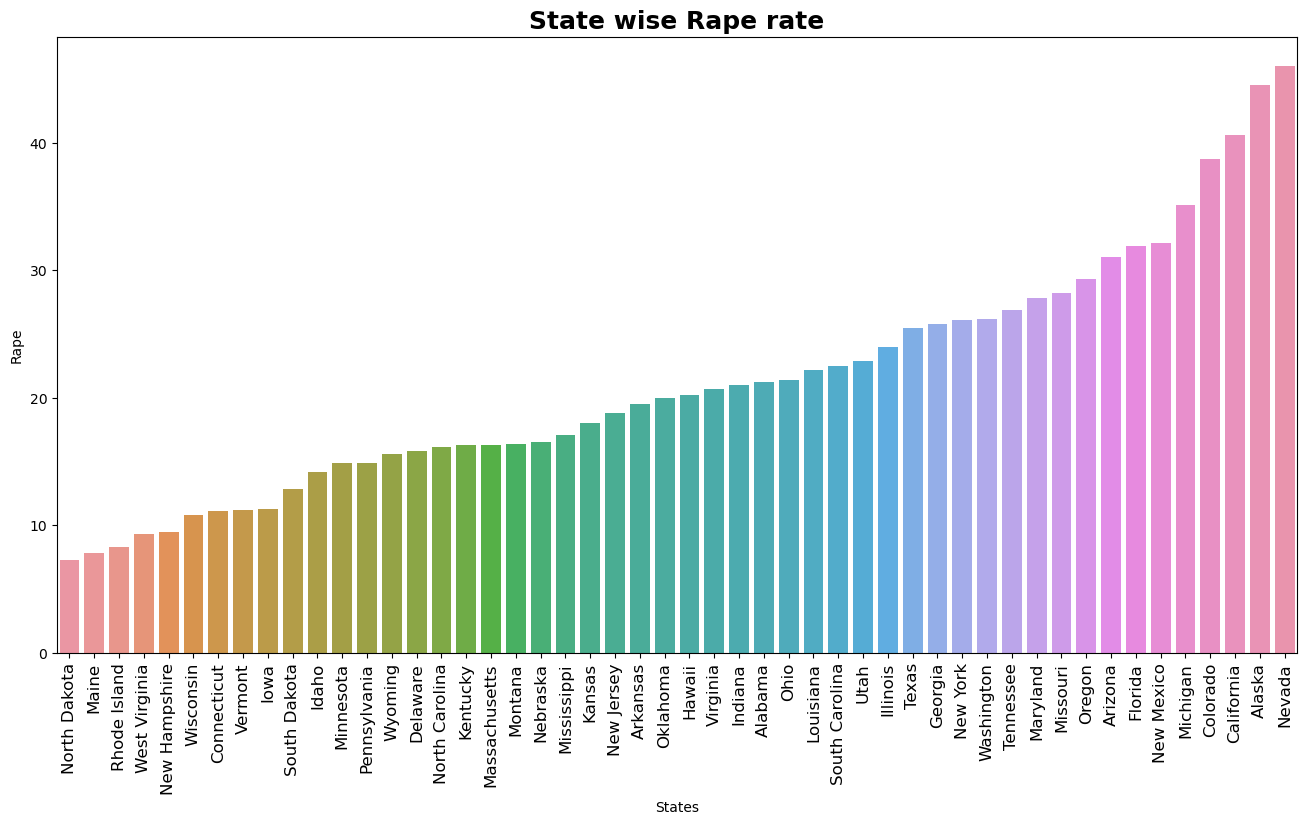

In [17]:
for i in crime_data.columns[1:]:
    plt.figure(figsize=(16,8))
    sb.barplot(x=crime_data["States"],y=i, data=crime_data, 
              order=crime_data.sort_values(i).States)
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("State wise "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

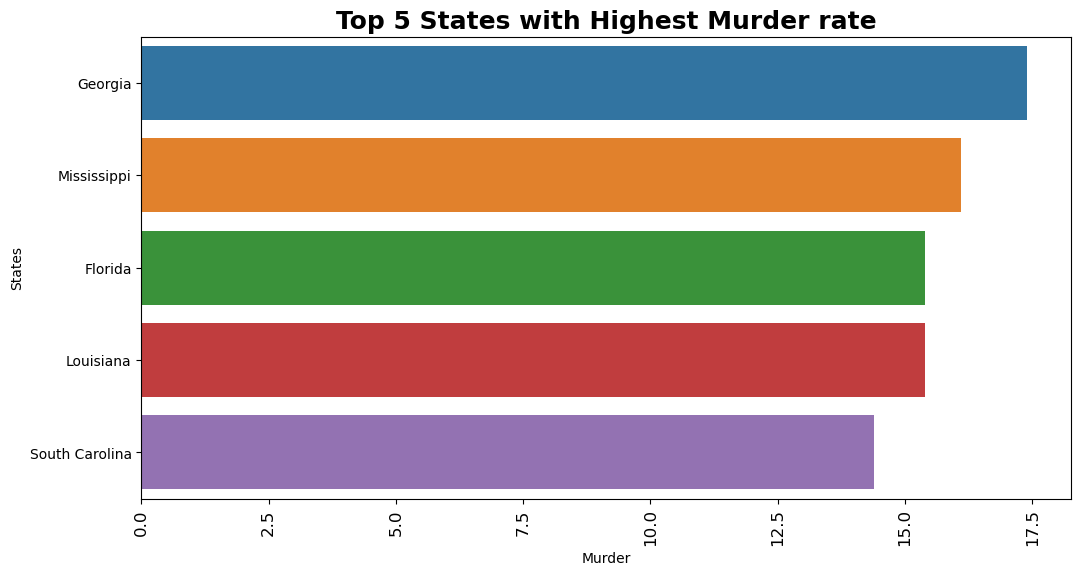

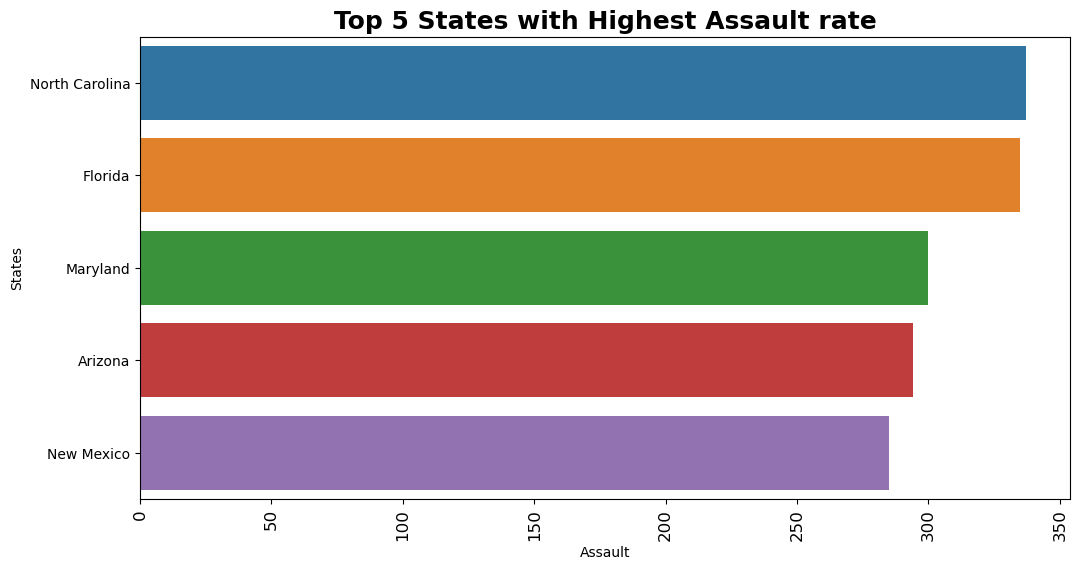

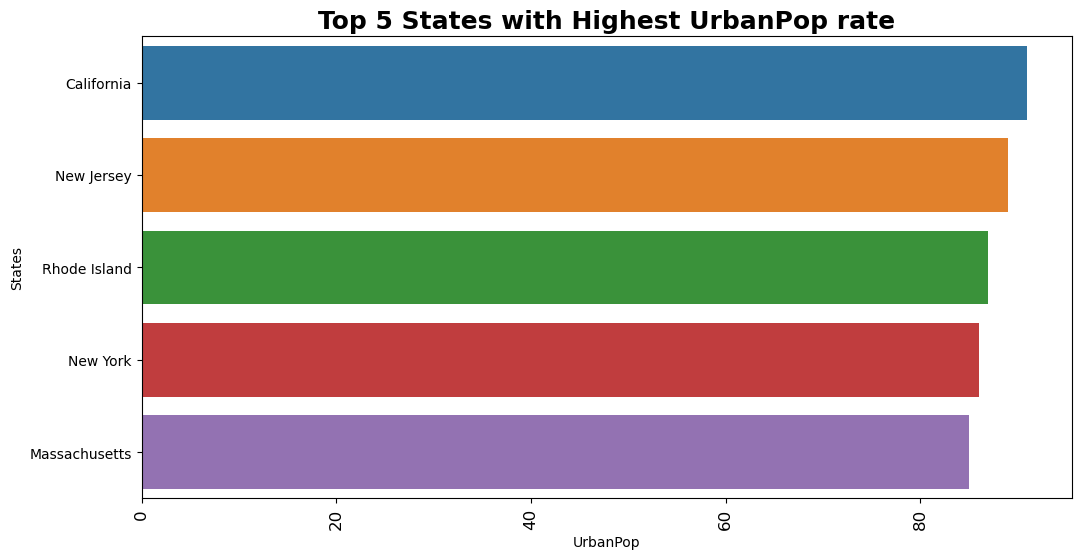

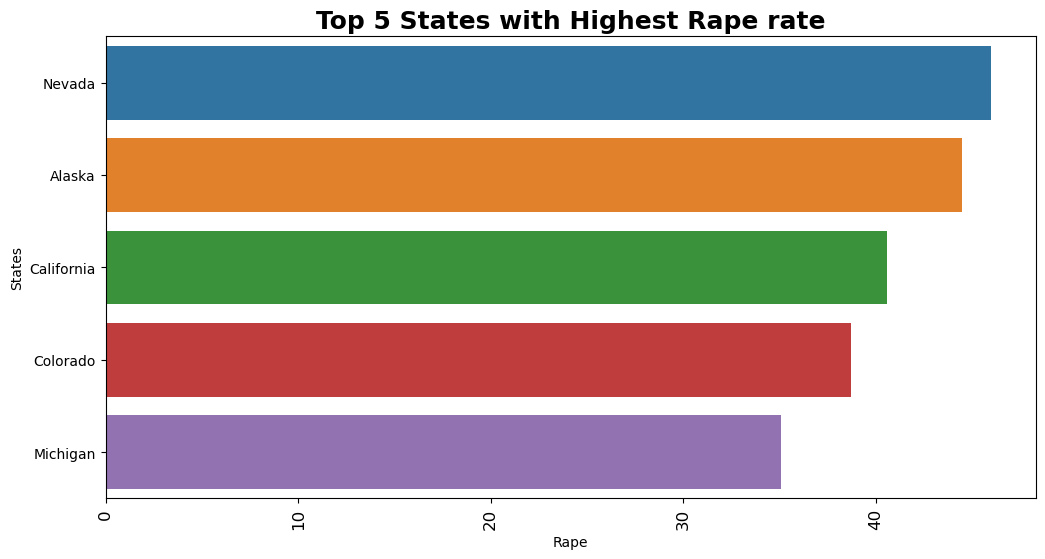

In [18]:
for i in crime_data.columns[1:]:
    plt.figure(figsize=(12,6))
    sb.barplot(x=i,y=crime_data["States"], data=crime_data, 
              order=crime_data.sort_values(i,ascending=False).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Highest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

#### Observation
+ In Florida, the Murder rate and Assault rate are high.
+ In California, the Urban population is high due to which the Rape rate is also high.
+ But in other countries, we don't see much resemblence.

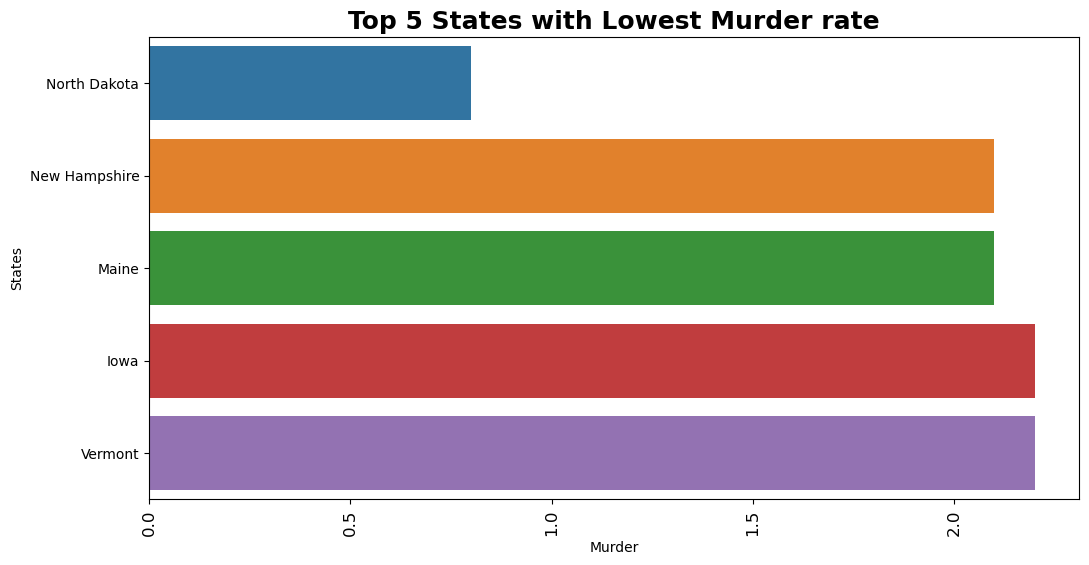

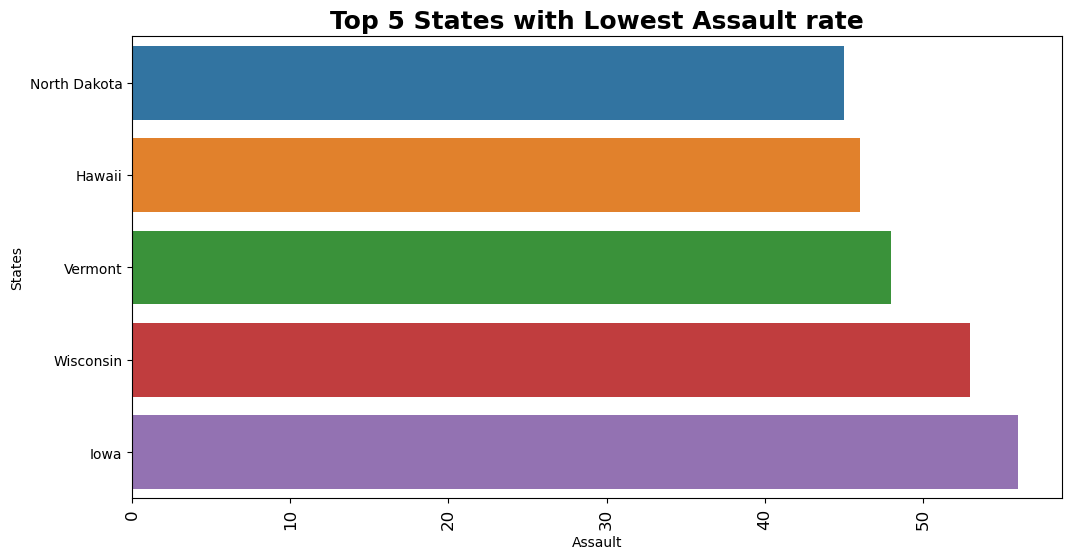

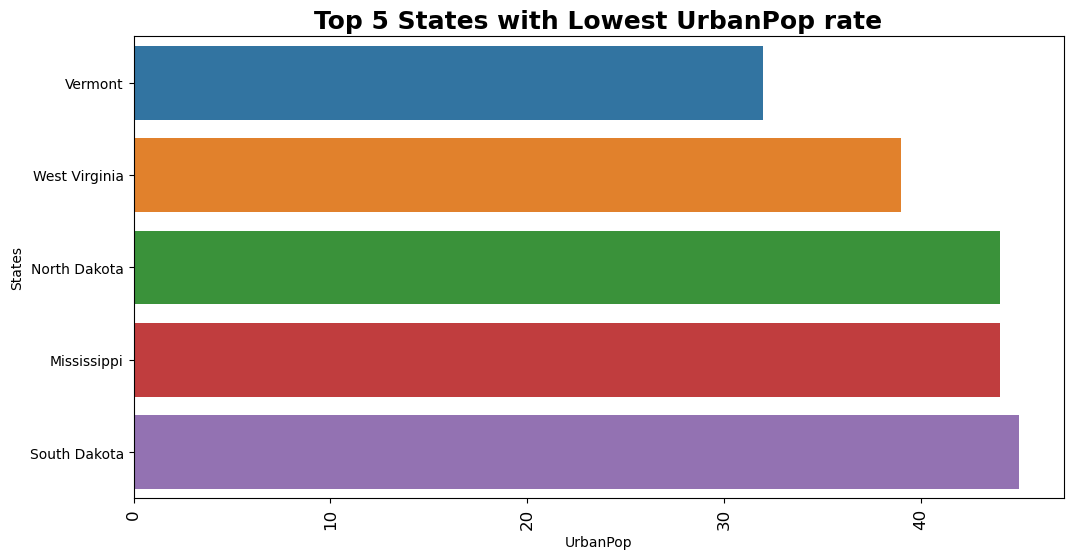

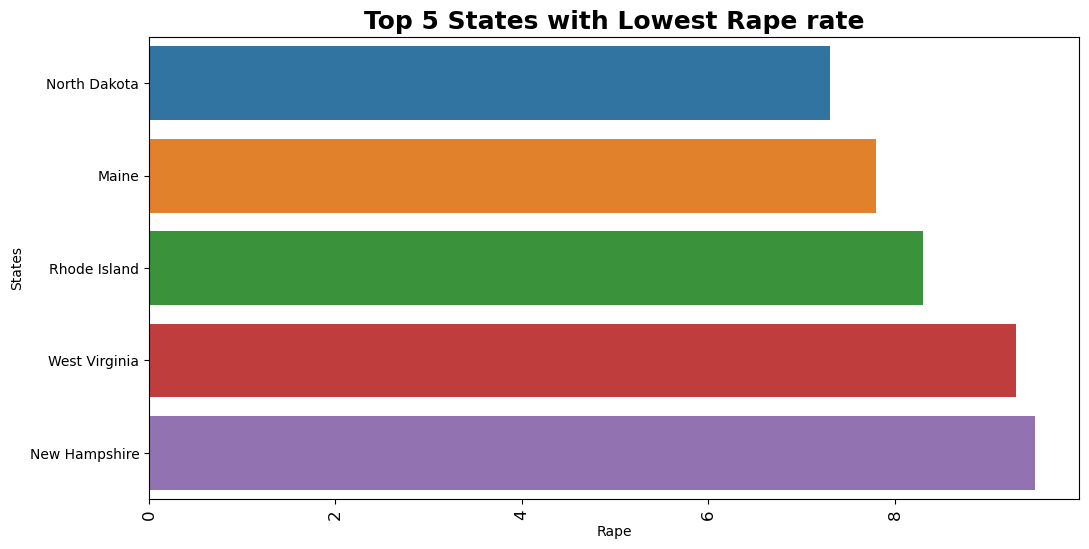

In [19]:
for i in crime_data.columns[1:]:
    plt.figure(figsize=(12,6))
    sb.barplot(x=i,y=crime_data["States"], data=crime_data, 
              order=crime_data.sort_values(i,ascending=True).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Lowest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

#### Observation
+ We can clearly see that the North Dakota has the lowest crime rate and the urban population is also less.
+ Vermont with lowest urban population has the low murder rate and assault rate. 
+ But in other countries, we don't see much resemblence.

### Step-3 : Pre-Processing the Data

### Step-3.1 : Standardising the data

In [20]:
crime_data_mdf = crime_data.drop(['States'],axis=1)
crime_data_mdf.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [21]:
standard_scaler = StandardScaler()
crime_data_std = standard_scaler.fit_transform(crime_data_mdf)
crime_data_std.shape

(50, 4)

### Step-3.2 : Normalising the data

In [22]:
min_max = MinMaxScaler()
crime_data_norm = min_max.fit_transform(crime_data_mdf)
crime_data_norm.shape

(50, 4)

#### However both give almost same result. So adopt Standardised data.

### Step-4 : Build Clustering model for Standardised data

### Step-4.1 : Using Hierarchical Clustering model

#### Step-4.1.1 : Creating Linkage to determine number of clusters

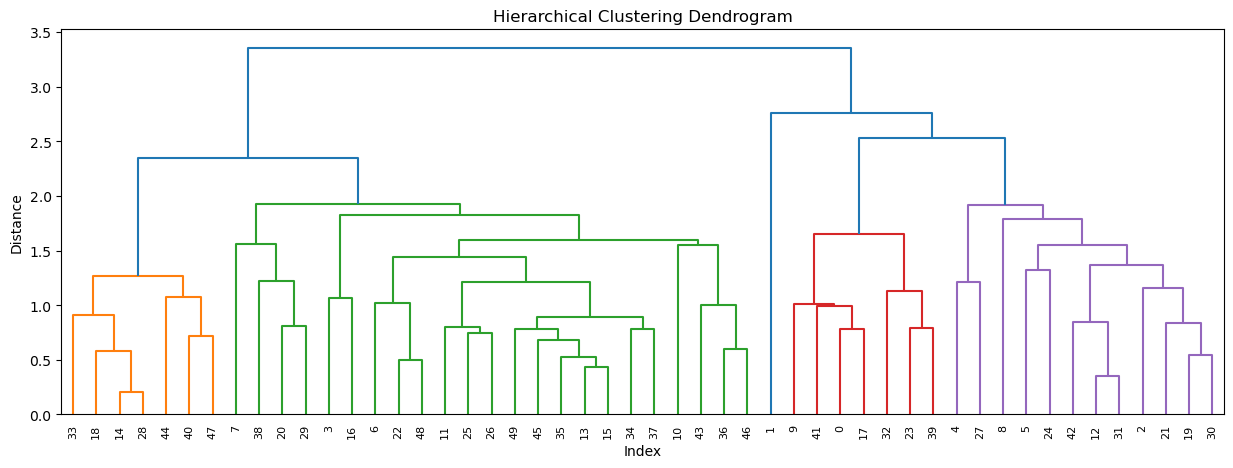

In [23]:
z = linkage(crime_data_std, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

#### Here we can see that there are 5 no . of clusters.

#### Step-4.1.2 : Buliding the Clustering model

#### Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [24]:
for nc in range(2,6):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(crime_data_std)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.34863679190476177
For n_clusters = 4 The average silhouette_score is : 0.3636819420151221
For n_clusters = 5 The average silhouette_score is : 0.3212682619092323


#### Model with 4 no. of clusters has the highest accuracy. Hence build the model with 4 no. of clusters.

In [25]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(crime_data_std) 
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
crime_data['clust']=cluster_labels
crime_data  

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


#### Step-4.1.3 : Analysing the results obtained from the model

In [26]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()   

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


#### We can see that 4 no. of clusters are formed.

#### Following are the Different states in each cluster

In [27]:
h_cluster_0 = crime_data[(crime_data.clust==0)]
h_cluster_0   

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [28]:
h_cluster_1 = crime_data[(crime_data.clust==1)]
h_cluster_1   

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [29]:
h_cluster_2 = crime_data[(crime_data.clust==2)]
h_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [30]:
h_cluster_3 = crime_data[(crime_data.clust==3)]
h_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


#### Observation
+ We can observe that Cluster-2 contains only one observation, that is of state 'Alaska'.
+ 'Alaska' has low urban population rate, but it has high Rape rate when compared to state 'South Calorina' of Cluster-3 having same urban popualtion rate. That is the reason why it stood differently from all the clusters.

<Figure size 960x480 with 0 Axes>

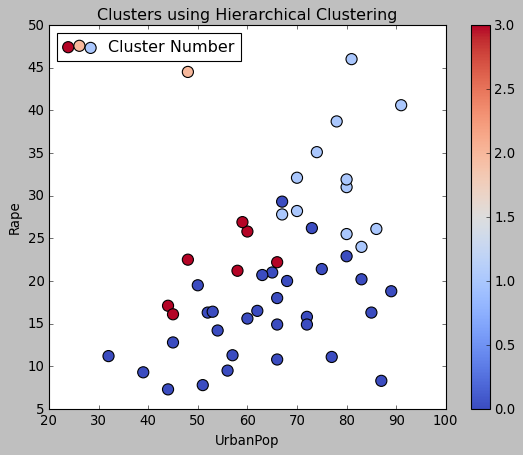

In [31]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="UrbanPop",y ="Rape",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 
plt.show()

#### Observation
+ We can see the different clusters indicated in different colors.
+ As mentioned above the Cluster-2 observation is completely different with low Urban population rate and high Rape rate.

<Figure size 960x480 with 0 Axes>

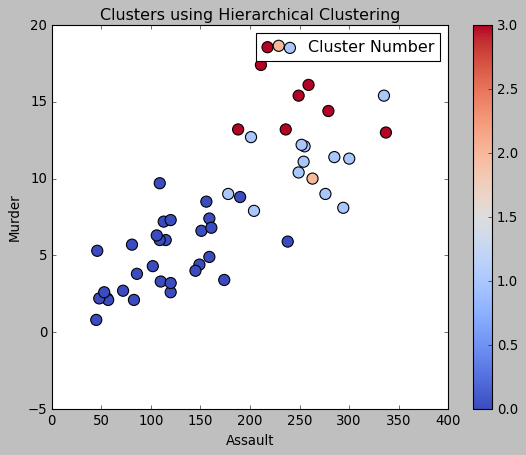

In [32]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering')
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [33]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_hc = sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
slht_scr_hc

0.3636819420151221

#### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### Step-4.2 : Using K-means Clustering model

#### Step-4.2.1 : Determing no. of clusters using 'Elbow method'

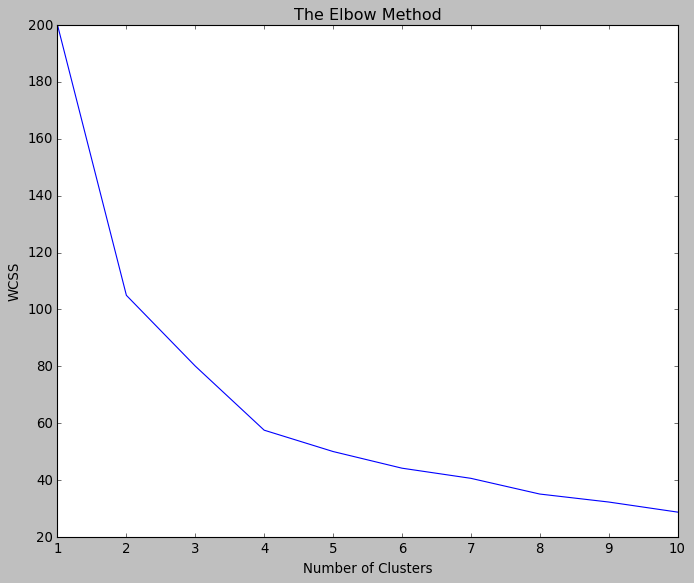

In [34]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(crime_data_std)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')

plt.show()  

#### Therefore from the elbow curve, we can observe that the number of clusters are 5.

#### Step-4.2.2 : Buliding the Clustering model

#### Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [35]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
for nc in range(2,6):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(crime_data_std)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263


#### Model with 4 no. of clusters has the highest accuracy. Hence build the model with 4 no. of clusters.

In [36]:
k_cluster = KMeans(n_clusters=4)
y_kmeans = k_cluster.fit_predict(crime_data_std)  

In [37]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [38]:
k_cluster.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [39]:
k_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [40]:
# Within cluster sum of squares or variance
k_cluster.inertia_

57.55425863091104

In [41]:
ks = pd.Series(y_kmeans) 
crime_data['clust']=ks
crime_data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


#### Step-4.2.3 : Analysing the results obtained from the model

In [42]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()   

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.0
1,13.937500,243.625000,53.750000,21.412500,1.0
2,10.815385,257.384615,76.000000,33.192308,2.0
3,3.600000,78.538462,52.076923,12.176923,3.0


#### Following are the Different states in each cluster

In [43]:
k_cluster_0 = crime_data[(crime_data.clust==0)]
k_cluster_0   

,States,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [44]:
k_cluster_1 = crime_data[(crime_data.clust==1)]
k_cluster_1   

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [45]:
k_cluster_2 = crime_data[(crime_data.clust==2)]
k_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [46]:
k_cluster_3 = crime_data[(crime_data.clust==3)]
k_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


<Figure size 960x480 with 0 Axes>

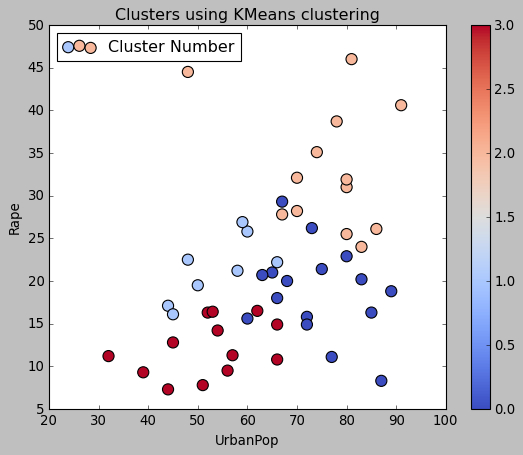

In [47]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="UrbanPop",y ="Rape",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

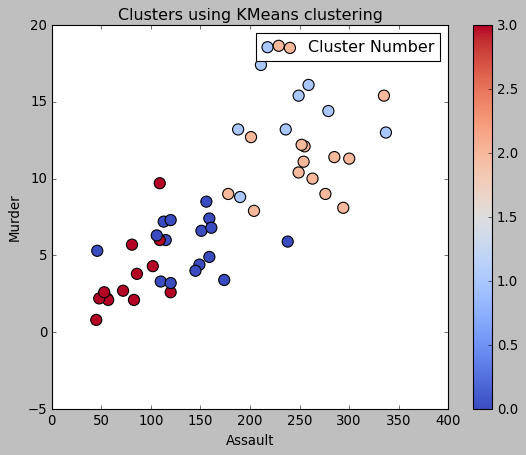

In [48]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [49]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(crime_data_std, k_cluster.labels_) 
slht_scr_kc

0.33968891433344395

#### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### Step-4.3 : DB Scan Clustering model

#### Step-4.3.1 : Determining epsilon value

In [50]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(crime_data_std)
distances, indices = nn.kneighbors(crime_data_std)  

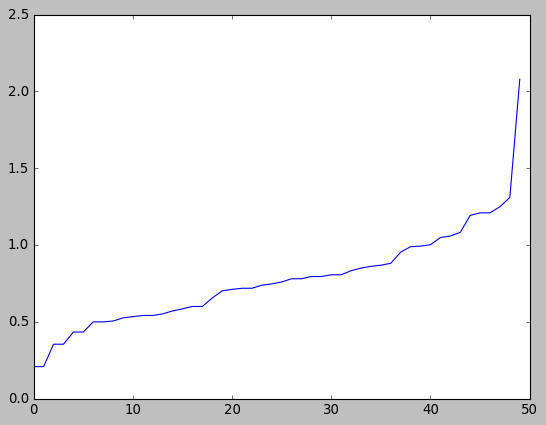

In [51]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

#### The curve took a sharp bend at a value of 1.25. Hence the epsilon value is 1.25.

#### Step-4.3.2 : Building the DB Scan clustering model

In [52]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_data_std)                      

DBSCAN(eps=1.25)

In [53]:
d_cluster.labels_ 

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [54]:
ds = pd.Series(d_cluster.labels_) 
crime_data['clust']=ds
crime_data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


#### Step-4.3.3 : Analysing the results obtained from the model

In [55]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


#### Following are the Different states in each cluster

In [56]:
d_cluster_neg1 = crime_data[(crime_data.clust==-1)]
d_cluster_neg1   

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


#### Clusters with label '-1' are generally categorised as Outliers.

In [57]:
d_cluster_0 = crime_data[(crime_data.clust==0)]
d_cluster_0   

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [58]:
d_cluster_1 = crime_data[(crime_data.clust==1)]
d_cluster_1   

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [59]:
d_cluster_2 = crime_data[(crime_data.clust==2)]
d_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 960x480 with 0 Axes>

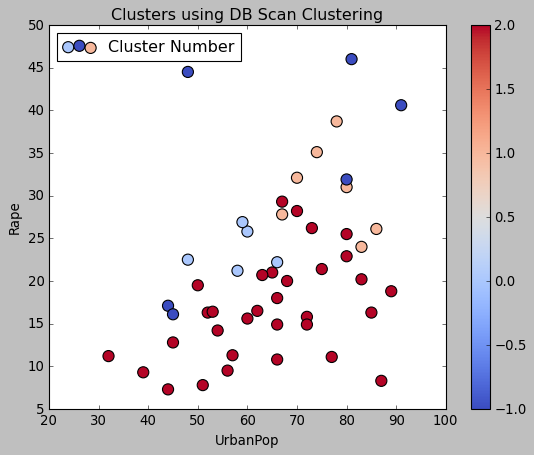

In [60]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="UrbanPop",y ="Rape",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan Clustering')  
plt.show()

<Figure size 960x480 with 0 Axes>

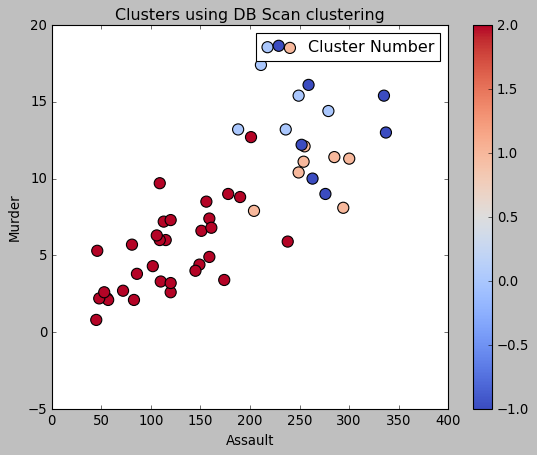

In [61]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan clustering') 
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [62]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_dc = sklearn.metrics.silhouette_score(crime_data_std, d_cluster.labels_) 
slht_scr_dc

0.23869670053300915

#### Observation
+ The Silhouette score considering 4 number of clusters is closer to '0'. Hence DB Scan clustering model is not able to classify the dataset accurately. However it detected outliers.

### Step-5 : Comparing all the models using Silhouette score

In [63]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

The Silhouette score of Hierarchical Clustering: 0.3636819420151221
The Silhouette score of KMeans Clustering: 0.33968891433344395
The Silhouette score of DB Scan Clustering: 0.23869670053300915


#### Here we can see that the Silhouette score for Hierarchical clustering is more than other two models.

### Step-6 : Conclusion

#### Hence the Hierarchical clustering model can be selected to classify the dataset.

<Figure size 960x480 with 0 Axes>

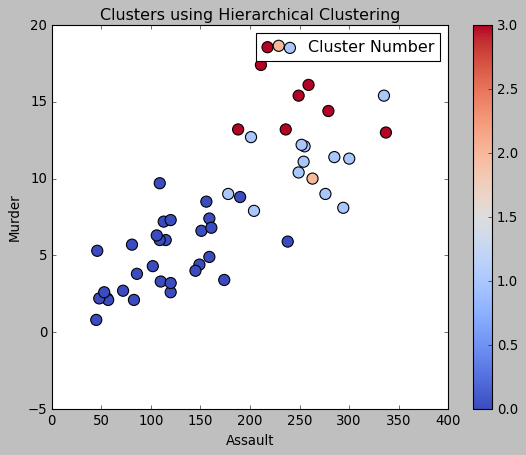

In [64]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number', kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering')
plt.show()

### The following can be observed from the above plot:
+ #### The States in Cluster-0 have less Murder, Assault and Rape rates and can be considered as Safe-Zone.
+ #### The States in Cluster-1 have moderate crime rates and can be considered as Moderate-Zone
+ #### The States in Cluster-3 have high crime rates and can be considered as Danger-Zone.

### The following can be observed from the EDA:
+ #### North Dakota is the state with lowest crime rate and can be considered as the safest place.
+ #### Florida is the state with high crime rate and is not a safe place. 